In [1]:
from ema_workbench import load_results
from ema_workbench.analysis import pairs_plotting
import matplotlib.pyplot as plt
from ema_workbench.analysis import feature_scoring
import seaborn as sns
from ema_workbench.analysis import prim
import pandas as pd
from SALib.analyze import sobol
from ema_workbench import Samplers
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from ema_workbench import Model, RealParameter, ScalarOutcome
from ema_workbench import MultiprocessingEvaluator, ema_logging

from ema_workbench import save_results
import numpy as np
import scipy

In [25]:
color_highway_east = '#87bc45'
color_highway_north = '#27aeef'
color_residential_south = '#edbf33'

# Speed preference

In [2]:
highway_east_HS_experiments, highway_east_HS_outcomes = load_results('data/highway_east/results_high_way_east_HS.gz')
highway_north_HS_experiments, highway_north_HS_outcomes = load_results('data/highway_north/results_high_way_north_HS.gz')
residential_south_HS_experiments, residential_south_HS_outcomes = load_results('data/residential_south/results_residential_south_HS.gz')
points_together_HS_experiments, points_together_HS_outcomes = load_results('data/points_together/results_points_together_HS.gz')

In [3]:
corr_mat = pd.DataFrame(columns=['high_way_east', 'high_way_north', 'residential_south'])

corr_mat.at["correlation", "high_way_east"] = scipy.stats.kendalltau(highway_east_HS_experiments["HS"], pd.DataFrame(highway_east_HS_outcomes)["continuity_mean"])[0]
corr_mat.at["p-value", "high_way_east"] = scipy.stats.kendalltau(highway_east_HS_experiments["HS"], pd.DataFrame(highway_east_HS_outcomes)["continuity_mean"])[1]


corr_mat.at["correlation", "high_way_north"] = scipy.stats.kendalltau(highway_north_HS_experiments["HS"], pd.DataFrame(highway_north_HS_outcomes)["continuity_mean"])[0]
corr_mat.at["p-value", "high_way_north"] = scipy.stats.kendalltau(highway_north_HS_experiments["HS"], pd.DataFrame(highway_north_HS_outcomes)["continuity_mean"])[1]


corr_mat.at["correlation", "residential_south"] = scipy.stats.kendalltau(residential_south_HS_experiments["HS"], pd.DataFrame(residential_south_HS_outcomes)["continuity_mean"])[0]
corr_mat.at["p-value", "residential_south"] = scipy.stats.kendalltau(residential_south_HS_experiments["HS"], pd.DataFrame(residential_south_HS_outcomes)["continuity_mean"])[1]

In [4]:
corr_mat

,high_way_east,high_way_north,residential_south
correlation,NaN,0.862109,0.007369
p-value,NaN,0.0,0.923114


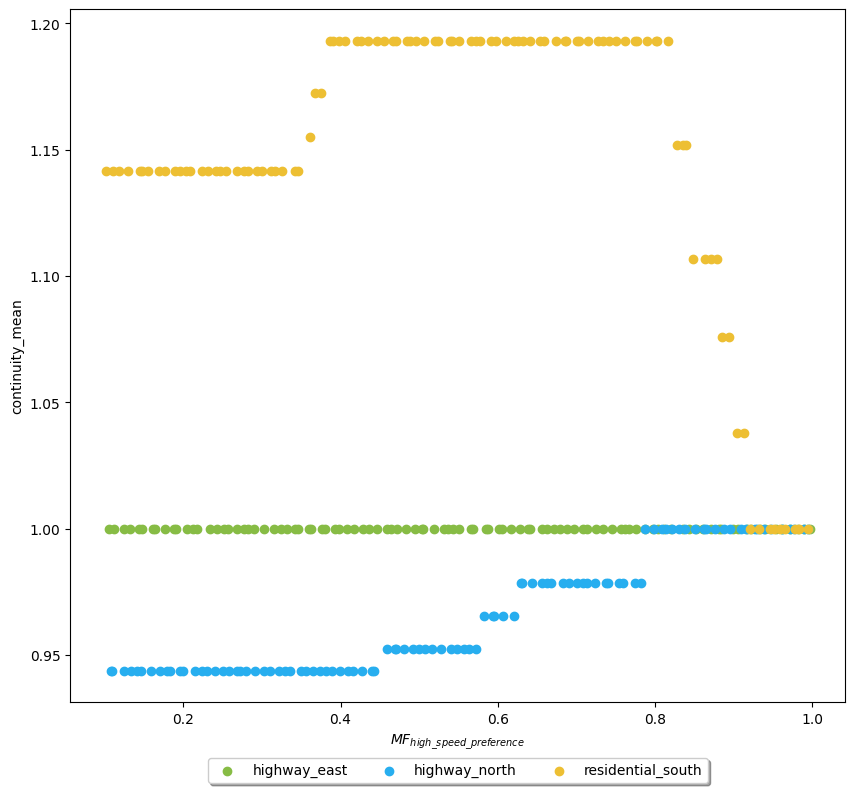

In [113]:
fig, axs = plt.subplots(1, 1, figsize=(10, 10))
axs.scatter(highway_east_HS_experiments["HS"], highway_east_HS_outcomes.get("continuity_mean"), color=color_highway_east, label='highway_east')
axs.scatter(highway_north_HS_experiments["HS"], highway_north_HS_outcomes.get("continuity_mean"), color=color_highway_north, label='highway_north')
axs.scatter(residential_south_HS_experiments["HS"], residential_south_HS_outcomes.get("continuity_mean"), color=color_residential_south, label='residential_south')

axs.set_ylabel('continuity_mean')
axs.set_xlabel("$MF_{high\_speed\_preference}$")


box = axs.get_position()
axs.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

axs.legend(loc='upper center', bbox_to_anchor=(0.5, -0.07),
          fancybox=True, shadow=True, ncol=5)

plt.savefig('plots/continuity_mean_HS.png', bbox_inches='tight')

In [35]:
corr_mat = pd.DataFrame(columns=['connectivity_mean', 'node_frequency_mean'])

for value in corr_mat.columns:
    corr_mat.at["correlation", value] = scipy.stats.kendalltau(points_together_HS_experiments["HS"], pd.DataFrame(points_together_HS_outcomes)[value])[0]
    corr_mat.at["p-value", value] = scipy.stats.kendalltau(points_together_HS_experiments["HS"], pd.DataFrame(points_together_HS_outcomes)[value])[1]

In [36]:
corr_mat

,connectivity_mean,node_frequency_mean
correlation,-0.869485,0.647725
p-value,0.0,0.0


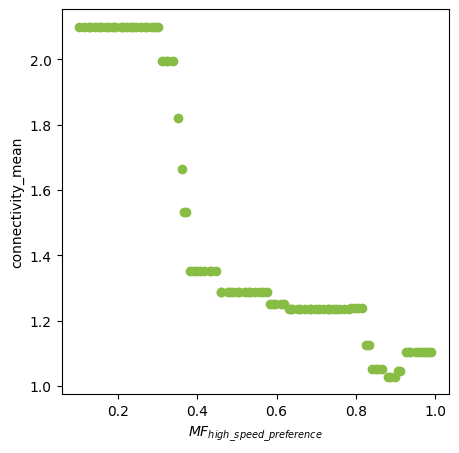

In [114]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5))
axs.scatter(points_together_HS_experiments["HS"], points_together_HS_outcomes.get("connectivity_mean"), color=color_highway_east, label='connectivity_mean')
axs.set_xlabel("$MF_{high\_speed\_preference}$")
axs.set_ylabel('connectivity_mean')
plt.savefig('plots/connectivity_mean_HS.png', bbox_inches='tight')

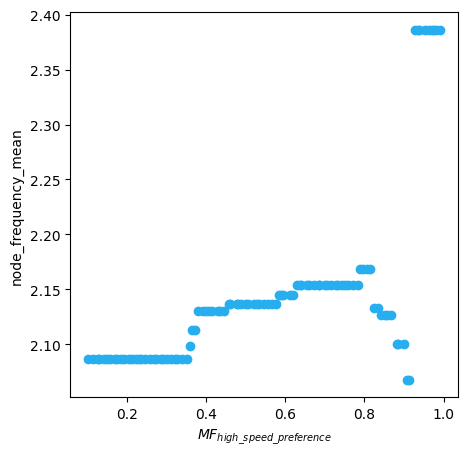

In [115]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5))
axs.scatter(points_together_HS_experiments["HS"], points_together_HS_outcomes.get("node_frequency_mean"), color=color_highway_north, label='node_frequency_mean')
axs.set_xlabel("$MF_{high\_speed\_preference}$")
axs.set_ylabel('node_frequency_mean')
plt.savefig('plots/node_frequency_mean_HS.png', bbox_inches='tight')

# Obstacle avoidance

In [42]:
highway_east_OA_experiments, highway_east_OA_outcomes = load_results('data/highway_east/results_high_way_east_OA.gz')
highway_north_OA_experiments, highway_north_OA_outcomes = load_results('data/highway_north/results_high_way_north_OA.gz')
residential_south_OA_experiments, residential_south_OA_outcomes = load_results('data/residential_south/results_residential_south_OA.gz')
points_together_OA_experiments, points_together_OA_outcomes = load_results('data/points_together/results_points_together_OA.gz')

In [44]:
corr_mat = pd.DataFrame(columns=['high_way_east', 'high_way_north', 'residential_south'])

corr_mat.at["correlation", "high_way_east"] = scipy.stats.kendalltau(highway_east_OA_experiments["OA"], pd.DataFrame(highway_east_OA_outcomes)["continuity_mean"])[0]
corr_mat.at["p-value", "high_way_east"] = scipy.stats.kendalltau(highway_east_OA_experiments["OA"], pd.DataFrame(highway_east_OA_outcomes)["continuity_mean"])[1]


corr_mat.at["correlation", "high_way_north"] = scipy.stats.kendalltau(highway_north_OA_experiments["OA"], pd.DataFrame(highway_north_OA_outcomes)["continuity_mean"])[0]
corr_mat.at["p-value", "high_way_north"] = scipy.stats.kendalltau(highway_north_OA_experiments["OA"], pd.DataFrame(highway_north_OA_outcomes)["continuity_mean"])[1]


corr_mat.at["correlation", "residential_south"] = scipy.stats.kendalltau(residential_south_OA_experiments["OA"], pd.DataFrame(residential_south_OA_outcomes)["continuity_mean"])[0]
corr_mat.at["p-value", "residential_south"] = scipy.stats.kendalltau(residential_south_OA_experiments["OA"], pd.DataFrame(residential_south_OA_outcomes)["continuity_mean"])[1]

In [45]:
corr_mat

,high_way_east,high_way_north,residential_south
correlation,0.795615,0.817856,0.845905
p-value,0.0,0.0,0.0


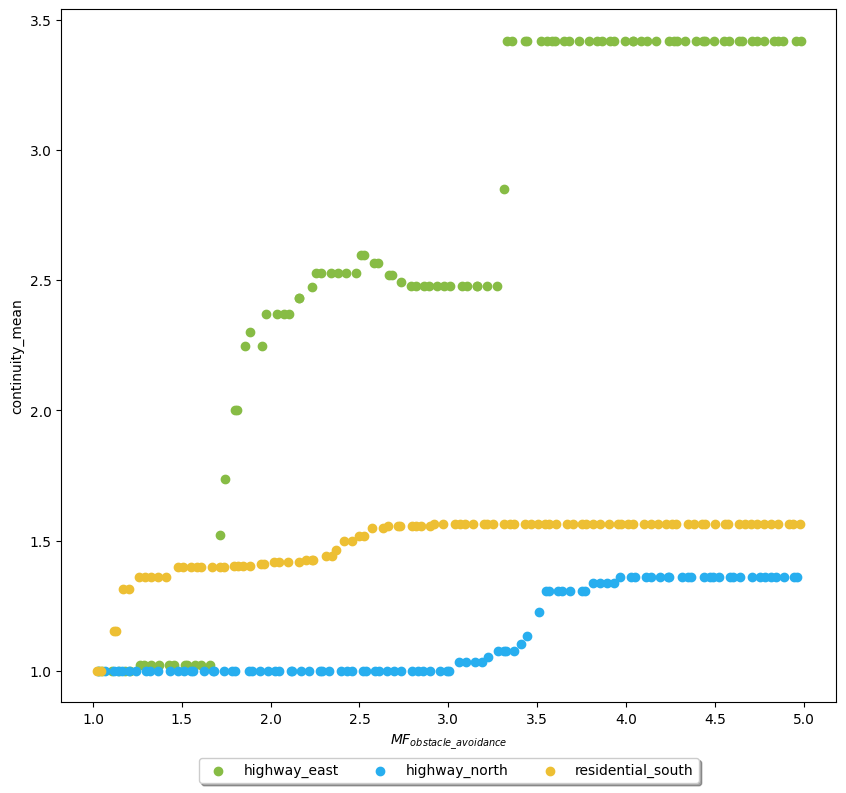

In [116]:
fig, axs = plt.subplots(1, 1, figsize=(10, 10))
axs.scatter(highway_east_OA_experiments["OA"], highway_east_OA_outcomes.get("continuity_mean"), color=color_highway_east, label='highway_east')
axs.scatter(highway_north_OA_experiments["OA"], highway_north_OA_outcomes.get("continuity_mean"), color=color_highway_north, label='highway_north')
axs.scatter(residential_south_OA_experiments["OA"], residential_south_OA_outcomes.get("continuity_mean"), color=color_residential_south, label='residential_south')


axs.set_ylabel('continuity_mean')
axs.set_xlabel("$MF_{obstacle\_avoidance}$")

box = axs.get_position()
axs.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

axs.legend(loc='upper center', bbox_to_anchor=(0.5, -0.07),
          fancybox=True, shadow=True, ncol=5)

plt.savefig('plots/continuity_mean_OA.png', bbox_inches='tight')

In [63]:
corr_mat = pd.DataFrame(columns=['connectivity_mean', 'node_frequency_mean'])

for value in corr_mat.columns:
    corr_mat.at["correlation", value] = scipy.stats.kendalltau(points_together_OA_experiments["OA"], pd.DataFrame(points_together_OA_outcomes)[value])[0]
    corr_mat.at["p-value", value] = scipy.stats.kendalltau(points_together_OA_experiments["OA"], pd.DataFrame(points_together_OA_outcomes)[value])[1]
    

In [52]:
corr_mat

,connectivity_mean,node_frequency_mean
correlation,0.085965,0.186939
p-value,0.218797,0.007704


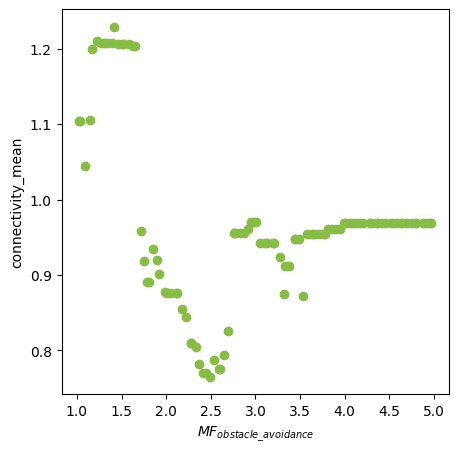

In [117]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5))
axs.scatter(points_together_OA_experiments["OA"], points_together_OA_outcomes.get("connectivity_mean"), color=color_highway_east, label='connectivity_mean')
axs.set_xlabel(highway_east_OA_experiments["OA"].name)
axs.set_ylabel('connectivity_mean')
axs.set_xlabel("$MF_{obstacle\_avoidance}$")
plt.savefig('plots/connectivity_mean_OA.png', bbox_inches='tight')

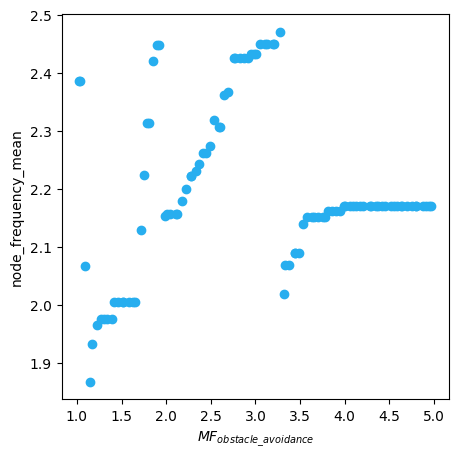

In [118]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5))
axs.scatter(points_together_OA_experiments["OA"], points_together_OA_outcomes.get("node_frequency_mean"), color=color_highway_north, label='node_frequency_mean')
axs.set_ylabel('node_frequency_mean')
axs.set_xlabel("$MF_{obstacle\_avoidance}$")
plt.savefig('plots/node_frequency_mean_OA.png', bbox_inches='tight')

# Residential preference

In [56]:
highway_east_RP_experiments, highway_east_RP_outcomes = load_results('data/highway_east/results_high_way_east_RP.gz')
highway_north_RP_experiments, highway_north_RP_outcomes = load_results('data/highway_north/results_high_way_north_RP.gz')
residential_south_RP_experiments, residential_south_RP_outcomes = load_results('data/residential_south/results_residential_south_RP.gz')
points_together_RP_experiments, points_together_RP_outcomes = load_results('data/points_together/results_points_together_RP.gz')

In [57]:
corr_mat = pd.DataFrame(columns=['high_way_east', 'high_way_north', 'residential_south'])

corr_mat.at["correlation", "high_way_east"] = scipy.stats.kendalltau(highway_east_RP_experiments["RP"], pd.DataFrame(highway_east_RP_outcomes)["continuity_mean"])[0]
corr_mat.at["p-value", "high_way_east"] = scipy.stats.kendalltau(highway_east_RP_experiments["RP"], pd.DataFrame(highway_east_RP_outcomes)["continuity_mean"])[1]


corr_mat.at["correlation", "high_way_north"] = scipy.stats.kendalltau(highway_north_RP_experiments["RP"], pd.DataFrame(highway_north_RP_outcomes)["continuity_mean"])[0]
corr_mat.at["p-value", "high_way_north"] = scipy.stats.kendalltau(highway_north_RP_experiments["RP"], pd.DataFrame(highway_north_RP_outcomes)["continuity_mean"])[1]


corr_mat.at["correlation", "residential_south"] = scipy.stats.kendalltau(residential_south_RP_experiments["RP"], pd.DataFrame(residential_south_RP_outcomes)["continuity_mean"])[0]
corr_mat.at["p-value", "residential_south"] = scipy.stats.kendalltau(residential_south_RP_experiments["RP"], pd.DataFrame(residential_south_RP_outcomes)["continuity_mean"])[1]

In [58]:
corr_mat

,high_way_east,high_way_north,residential_south
correlation,-0.829718,-0.693696,-0.766437
p-value,0.0,0.0,0.0


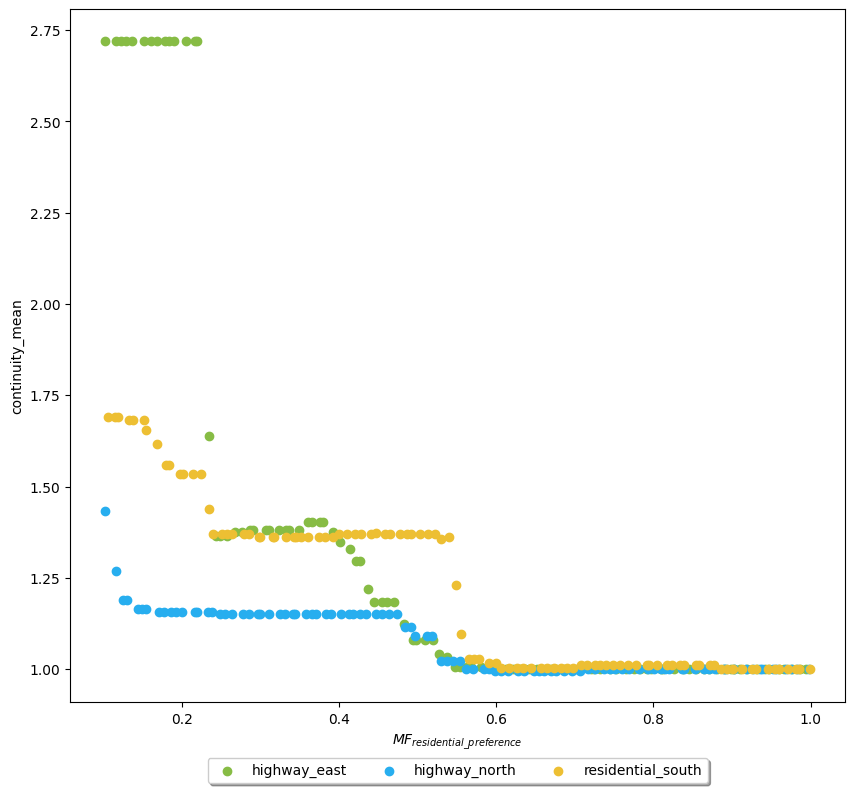

In [119]:
fig, axs = plt.subplots(1, 1, figsize=(10, 10))
axs.scatter(highway_east_RP_experiments["RP"], highway_east_RP_outcomes.get("continuity_mean"), color=color_highway_east, label='highway_east')
axs.scatter(highway_north_RP_experiments["RP"], highway_north_RP_outcomes.get("continuity_mean"), color=color_highway_north, label='highway_north')
axs.scatter(residential_south_RP_experiments["RP"], residential_south_RP_outcomes.get("continuity_mean"), color=color_residential_south, label='residential_south')


axs.set_xlabel("$MF_{residential\_preference}$")
axs.set_ylabel('continuity_mean')


box = axs.get_position()
axs.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

axs.legend(loc='upper center', bbox_to_anchor=(0.5, -0.07),
          fancybox=True, shadow=True, ncol=5)
plt.savefig('plots/continuity_mean_RP.png', bbox_inches='tight')

In [66]:
corr_mat = pd.DataFrame(columns=['connectivity_mean', 'node_frequency_mean'])

for value in corr_mat.columns:
    corr_mat.at["correlation", value] = scipy.stats.kendalltau(points_together_RP_experiments["RP"], pd.DataFrame(points_together_RP_outcomes)[value])[0]
    corr_mat.at["p-value", value] = scipy.stats.kendalltau(points_together_RP_experiments["RP"], pd.DataFrame(points_together_RP_outcomes)[value])[1]
    

In [67]:
corr_mat

,connectivity_mean,node_frequency_mean
correlation,0.585108,0.130801
p-value,0.0,0.061922


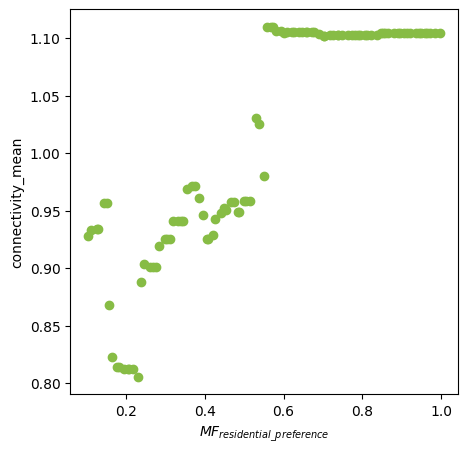

In [120]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5))
axs.scatter(points_together_RP_experiments["RP"], points_together_RP_outcomes.get("connectivity_mean"), color=color_highway_east, label='connectivity_mean')
axs.set_xlabel("$MF_{residential\_preference}$")
axs.set_ylabel('connectivity_mean')
plt.savefig('plots/connectivity_mean_RP.png', bbox_inches='tight')

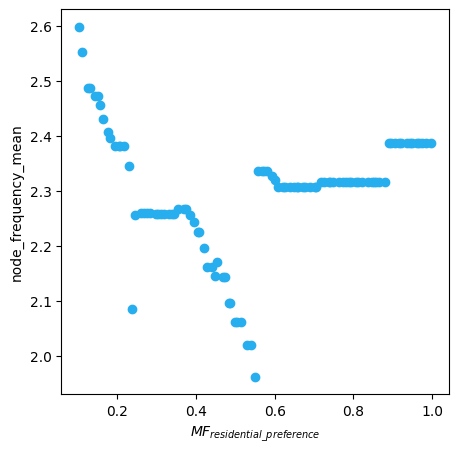

In [121]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5))
axs.scatter(points_together_RP_experiments["RP"], points_together_RP_outcomes.get("node_frequency_mean"), color=color_highway_north, label='node_frequency_mean')
axs.set_xlabel("$MF_{residential\_preference}$")
axs.set_ylabel('node_frequency_mean')
plt.savefig('plots/node_frequency_mean_RP.png', bbox_inches='tight')

# traffic avoidance

In [70]:
highway_east_TA_experiments, highway_east_TA_outcomes = load_results('data/highway_east/results_high_way_east_TA.gz')
highway_north_TA_experiments, highway_north_TA_outcomes = load_results('data/highway_north/results_high_way_north_TA.gz')
residential_south_TA_experiments, residential_south_TA_outcomes = load_results('data/residential_south/results_residential_south_TA.gz')
points_together_TA_experiments, points_together_TA_outcomes = load_results('data/points_together/results_points_together_TA.gz')

In [71]:
corr_mat = pd.DataFrame(columns=['high_way_east', 'high_way_north', 'residential_south'])

corr_mat.at["correlation", "high_way_east"] = scipy.stats.kendalltau(highway_east_TA_experiments["TA"], pd.DataFrame(highway_east_TA_outcomes)["continuity_mean"])[0]
corr_mat.at["p-value", "high_way_east"] = scipy.stats.kendalltau(highway_east_TA_experiments["TA"], pd.DataFrame(highway_east_TA_outcomes)["continuity_mean"])[1]


corr_mat.at["correlation", "high_way_north"] = scipy.stats.kendalltau(highway_north_TA_experiments["TA"], pd.DataFrame(highway_north_TA_outcomes)["continuity_mean"])[0]
corr_mat.at["p-value", "high_way_north"] = scipy.stats.kendalltau(highway_north_TA_experiments["TA"], pd.DataFrame(highway_north_TA_outcomes)["continuity_mean"])[1]


corr_mat.at["correlation", "residential_south"] = scipy.stats.kendalltau(residential_south_TA_experiments["TA"], pd.DataFrame(residential_south_TA_outcomes)["continuity_mean"])[0]
corr_mat.at["p-value", "residential_south"] = scipy.stats.kendalltau(residential_south_TA_experiments["TA"], pd.DataFrame(residential_south_TA_outcomes)["continuity_mean"])[1]

In [72]:
corr_mat

,high_way_east,high_way_north,residential_south
correlation,0.869692,0.706401,0.843815
p-value,0.0,0.0,0.0


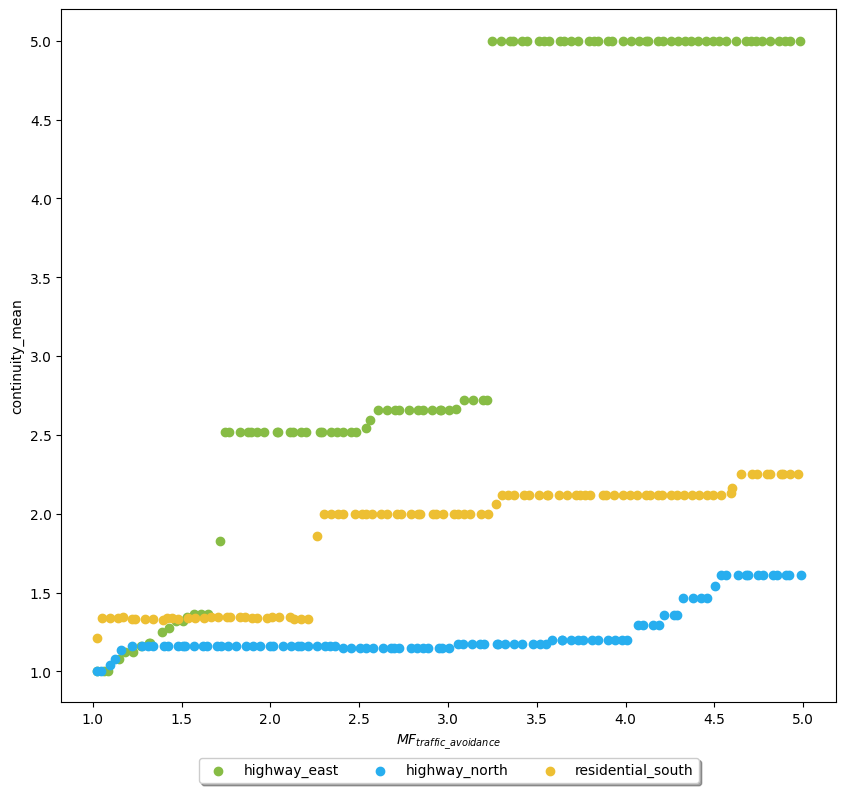

In [122]:
fig, axs = plt.subplots(1, 1, figsize=(10, 10))
axs.scatter(highway_east_TA_experiments["TA"], highway_east_TA_outcomes.get("continuity_mean"), color=color_highway_east, label='highway_east')
axs.scatter(highway_north_TA_experiments["TA"], highway_north_TA_outcomes.get("continuity_mean"), color=color_highway_north, label='highway_north')
axs.scatter(residential_south_TA_experiments["TA"], residential_south_TA_outcomes.get("continuity_mean"), color=color_residential_south, label='residential_south')

axs.set_xlabel("$MF_{traffic\_avoidance}$")
axs.set_ylabel('continuity_mean')


box = axs.get_position()
axs.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

axs.legend(loc='upper center', bbox_to_anchor=(0.5, -0.07),
          fancybox=True, shadow=True, ncol=5)
plt.savefig('plots/continuity_mean_TA.png', bbox_inches='tight')

In [74]:
corr_mat = pd.DataFrame(columns=['connectivity_mean', 'node_frequency_mean'])

for value in corr_mat.columns:
    corr_mat.at["correlation", value] = scipy.stats.kendalltau(points_together_TA_experiments["TA"], pd.DataFrame(points_together_RP_outcomes)[value])[0]
    corr_mat.at["p-value", value] = scipy.stats.kendalltau(points_together_TA_experiments["TA"], pd.DataFrame(points_together_RP_outcomes)[value])[1]
    

In [75]:
corr_mat

,connectivity_mean,node_frequency_mean
correlation,0.095722,0.128281
p-value,0.167441,0.067117


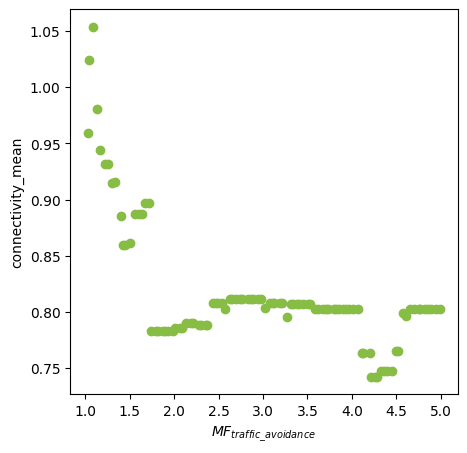

In [123]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5))
axs.scatter(points_together_TA_experiments["TA"], points_together_TA_outcomes.get("connectivity_mean"), color=color_highway_east, label='connectivity_mean')
axs.set_xlabel("$MF_{traffic\_avoidance}$")
axs.set_ylabel('connectivity_mean')
plt.savefig('plots/connectivity_mean_TA.png', bbox_inches='tight')

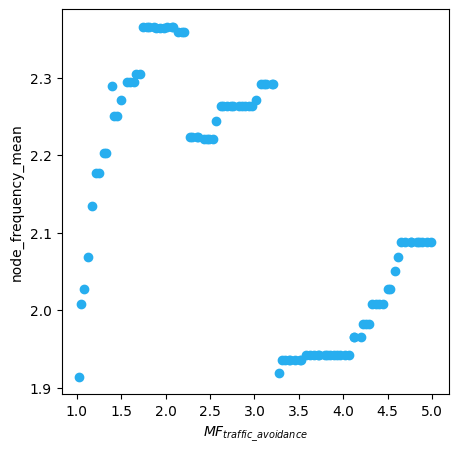

In [124]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5))
axs.scatter(points_together_TA_experiments["TA"], points_together_TA_outcomes.get("node_frequency_mean"), color=color_highway_north, label='node_frequency_mean')
axs.set_xlabel("$MF_{traffic\_avoidance}$")
axs.set_ylabel('node_frequency_mean')
plt.savefig('plots/node_frequency_mean_TA.png', bbox_inches='tight')